
=== Running on Advertising Dataset ===


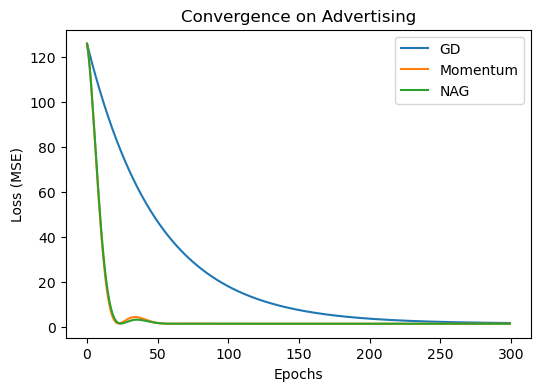


=== Running on Housing Dataset ===


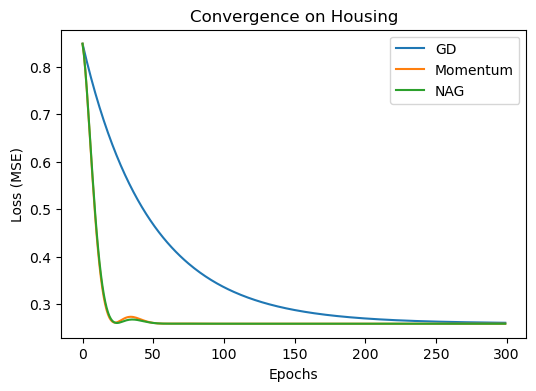


=== Running on FAA_AI Dataset ===


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


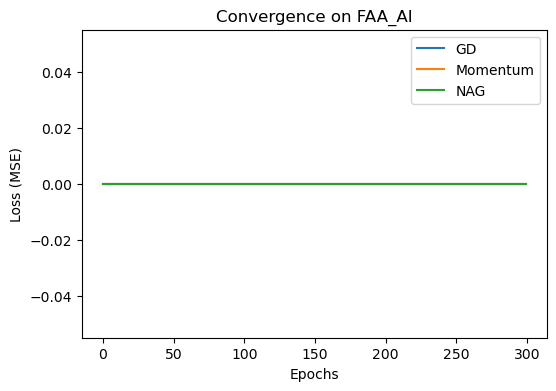

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler,LabelEncoder
import matplotlib.pyplot as plt

# ----------------------------
# Load datasets
# ----------------------------
def load_dataset(path):
    data = pd.read_csv(path)

    # Separate features and target
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]

    # Encode categorical features
    for col in X.columns:
        if X[col].dtype == 'object':  # if it's string/categorical
            X[col] = LabelEncoder().fit_transform(X[col])

    # Encode target if categorical
    if y.dtype == 'object':
        y = LabelEncoder().fit_transform(y)

    # Scale features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    return X, y



# ----------------------------
# Loss function (MSE)
# ----------------------------
def compute_loss(X, y, w):
    n = len(y)
    y_pred = X.dot(w)
    return (1 / (2 * n)) * np.sum((y_pred - y) ** 2)


# ----------------------------
# Gradient
# ----------------------------
def compute_gradient(X, y, w):
    n = len(y)
    return (1 / n) * X.T.dot(X.dot(w) - y)


# ----------------------------
# Simple Gradient Descent
# ----------------------------
def gradient_descent(X, y, lr=0.01, epochs=1000):
    w = np.zeros(X.shape[1])
    losses = []
    for _ in range(epochs):
        grad = compute_gradient(X, y, w)
        w -= lr * grad
        losses.append(compute_loss(X, y, w))
    return w, losses


# ----------------------------
# Momentum Gradient Descent
# ----------------------------
def momentum_gd(X, y, lr=0.01, epochs=1000, gamma=0.9):
    w = np.zeros(X.shape[1])
    v = np.zeros_like(w)
    losses = []
    for _ in range(epochs):
        grad = compute_gradient(X, y, w)
        v = gamma * v + lr * grad
        w -= v
        losses.append(compute_loss(X, y, w))
    return w, losses


# ----------------------------
# Nesterov Accelerated Gradient
# ----------------------------
def nag_gd(X, y, lr=0.01, epochs=1000, gamma=0.9):
    w = np.zeros(X.shape[1])
    v = np.zeros_like(w)
    losses = []
    for _ in range(epochs):
        grad = compute_gradient(X, y, w - gamma * v)  # lookahead
        v = gamma * v + lr * grad
        w -= v
        losses.append(compute_loss(X, y, w))
    return w, losses


# ----------------------------
# Run experiments
# ----------------------------
datasets = {
    "Advertising": "advertising.csv",
    "Housing": "Housing.csv",
    "FAA_AI": "faa_ai_prelim.csv"
}

for name, path in datasets.items():
    print(f"\n=== Running on {name} Dataset ===")
    X, y = load_dataset(path)

    # Add bias column
    X = np.c_[np.ones(X.shape[0]), X]

    # Train with 3 methods
    w_gd, losses_gd = gradient_descent(X, y, lr=0.01, epochs=300)
    w_mom, losses_mom = momentum_gd(X, y, lr=0.01, epochs=300)
    w_nag, losses_nag = nag_gd(X, y, lr=0.01, epochs=300)

    # Plot
    plt.figure(figsize=(6,4))
    plt.plot(losses_gd, label="GD")
    plt.plot(losses_mom, label="Momentum")
    plt.plot(losses_nag, label="NAG")
    plt.xlabel("Epochs")
    plt.ylabel("Loss (MSE)")
    plt.title(f"Convergence on {name}")
    plt.legend()
    plt.show()
